# Оценка рыночной стоимости квартир по данным Яндекс.Недвижимости
Цель проекта — построить модель для прогнозирования рыночной стоимости квартир на основе архивных объявлений о продаже. Решение задачи поможет автоматизировать контроль за аномалиями и потенциальным мошенничеством.

Источник данных: архив объявлений Яндекс.Недвижимости с информацией о квартирах, включая как пользовательские данные (площадь, этаж, число комнат), так и геоданные (расстояния до центра, аэропорта, водоёма и т.д.).

Основные этапы:

- Очистка и предобработка данных.

- Анализ влияния различных параметров на цену.

- Обучение моделей регрессии и оценка точности предсказаний.

Проект демонстрирует навыки в анализе и обработке табличных данных, построении моделей регрессии и выявлении факторов, влияющих на цену недвижимости.

## Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

#### 1. Загрузите данные из файла в датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
data = pd.read_csv('real_estate_data.csv', sep='\t')

#### 2. Изучите общую информацию о полученном датафрейме.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

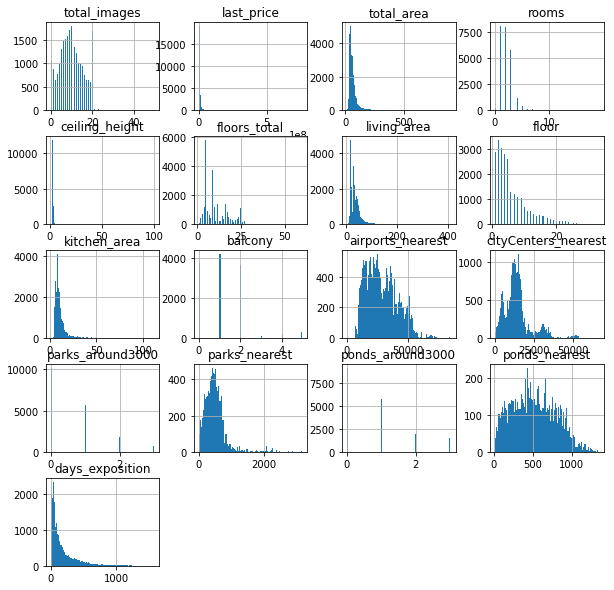

In [6]:
data.hist(bins=100, figsize=(10,10))

### Предобработка данных

#### 1. Найдите и изучите пропущенные значения в столбцах:

##### Определите, в каких столбцах есть пропуски.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- Доля пропусков

In [8]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

##### Заполните пропущенные значения там, где это возможно

- is_apartment  

Скорее всего, если не указали, то квартира не является апартаментом.

In [9]:
data['is_apartment'].fillna(False, inplace=True)

- ceiling_height

In [10]:
data[~data['ceiling_height'].isna()].corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.117685,0.111669,0.089446,-0.001987,0.029351,0.096049,0.043810,0.016219,-0.029433,-0.018210,0.117781,0.107535,-0.001030,-0.045389,0.018359,0.005827,-0.011957,0.001005,-0.036358
last_price,0.117685,1.000000,0.712968,0.401501,0.085430,0.003355,0.615393,0.037669,0.023010,-0.025219,0.004616,0.535970,0.014609,-0.027544,-0.227235,0.181583,-0.024382,0.174708,-0.121912,0.094326
total_area,0.111669,0.712968,1.000000,0.760946,0.095490,-0.058102,0.942661,-0.007119,0.030614,-0.065257,-0.000103,0.612415,0.046379,-0.029805,-0.239614,0.186307,-0.029868,0.160156,-0.127596,0.159811
rooms,0.089446,0.401501,0.760946,1.000000,0.054457,-0.209277,0.846796,-0.136958,-0.006894,-0.137770,-0.037203,0.282702,0.035372,-0.058021,-0.189678,0.144500,-0.045835,0.093669,-0.086668,0.144097
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.029351,0.003355,-0.058102,-0.209277,-0.028732,1.000000,-0.151574,0.674782,-0.029647,0.057337,0.022629,0.168380,0.191463,0.113122,0.008860,-0.232952,0.090397,-0.128909,0.061344,-0.056463
living_area,0.096049,0.615393,0.942661,0.846796,0.090650,-0.151574,1.000000,-0.080833,0.026668,-0.050367,-0.011972,0.439110,0.017407,-0.053793,-0.238644,0.195683,-0.049636,0.144990,-0.111247,0.150591
floor,0.043810,0.037669,-0.007119,-0.136958,-0.011798,0.674782,-0.080833,1.000000,-0.013164,0.032232,0.019800,0.142889,0.167843,0.077160,-0.001881,-0.147891,0.066093,-0.074173,0.034012,-0.035329
is_apartment,0.016219,0.023010,0.030614,-0.006894,0.154959,-0.029647,0.026668,-0.013164,1.000000,-0.004030,-0.001775,0.038195,0.045648,0.026864,0.016906,0.015614,-0.037274,0.018218,0.001970,0.005714
studio,-0.029433,-0.025219,-0.065257,-0.137770,0.001674,0.057337,-0.050367,0.032232,-0.004030,1.000000,-0.002351,NaN,0.017031,-0.020182,-0.012781,-0.028579,-0.006501,0.000186,0.006837,-0.013136


Не видно, чтобы высота потолков зависело от чего-то. Заменим пропуски на медианное значение.

In [11]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

- living_area

In [12]:
data[~data['living_area'].isna()].corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.106397,0.120603,0.098488,0.002010,0.009475,0.104780,0.030795,0.009262,-0.031015,-0.027787,0.110174,0.121478,0.000004,-0.050394,0.019176,-0.007929,-0.015470,0.002103,-0.037363
last_price,0.106397,1.000000,0.641534,0.361256,0.062542,-0.006356,0.566492,0.026111,0.026201,-0.025021,-0.017016,0.517540,0.035223,-0.028181,-0.202540,0.149024,-0.015934,0.155870,-0.079391,0.076717
total_area,0.120603,0.641534,1.000000,0.773379,0.079607,-0.076971,0.939537,-0.025788,0.027700,-0.074294,-0.046018,0.609097,0.051009,-0.035122,-0.234567,0.169727,-0.019984,0.164794,-0.096920,0.149127
rooms,0.098488,0.361256,0.773379,1.000000,0.047354,-0.230057,0.845977,-0.152502,-0.003894,-0.147784,-0.090476,0.270039,0.019185,-0.062024,-0.187822,0.138045,-0.050447,0.092576,-0.055854,0.129349
ceiling_height,0.002010,0.062542,0.079607,0.047354,1.000000,-0.026516,0.078623,-0.012754,0.159029,0.000255,0.017667,0.071449,0.043424,-0.018764,-0.074026,0.056206,-0.019742,0.062811,-0.047872,0.015574
floors_total,0.009475,-0.006356,-0.076971,-0.230057,-0.026516,1.000000,-0.169311,0.678478,-0.022669,0.073967,0.050531,0.168433,0.199123,0.110309,0.016738,-0.251097,0.102828,-0.123757,0.045487,-0.055549
living_area,0.104780,0.566492,0.939537,0.845977,0.078623,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.030795,0.026111,-0.025788,-0.152502,-0.012754,0.678478,-0.097210,1.000000,-0.009108,0.038625,0.034647,0.139112,0.172572,0.072610,0.006919,-0.162700,0.075060,-0.077575,0.028316,-0.042147
is_apartment,0.009262,0.026201,0.027700,-0.003894,0.159029,-0.022669,0.026969,-0.009108,1.000000,-0.003520,-0.002347,0.041248,0.046333,0.015260,0.002483,0.022497,-0.034682,0.022552,-0.001748,0.021471
studio,-0.031015,-0.025021,-0.074294,-0.147784,0.000255,0.073967,-0.056231,0.038625,-0.003520,1.000000,-0.004279,NaN,0.032407,-0.019961,-0.008680,-0.031065,0.009820,-0.003142,0.006161,-0.022751


Видно, что жилая площадь хорошо зависит от Общей площади квартиры и числа комнат. И от общей площади зависимость больше

In [13]:
categories = pd.qcut(data.total_area, 6)
data['total_area_cat'] = categories
data.groupby('total_area_cat').living_area.agg(['median','count'])

,median,count
total_area_cat,,
"(11.999, 36.0]",17.0,3799
"(36.0, 43.6]",18.6,3490
"(43.6, 52.0]",28.3,3734
"(52.0, 62.0]",33.5,3558
"(62.0, 79.6]",42.0,3615
"(79.6, 900.0]",58.0,3600


In [14]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area_cat')['living_area'].transform('median'))

- floors_total 

Поищем зависимости floors_total

In [15]:
data[~data['floors_total'].isna()].corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104940,0.116425,0.099385,0.004411,0.010427,0.105451,0.033286,0.010423,-0.028116,-0.024607,0.105773,0.117741,-0.002632,-0.047935,0.020989,-0.006209,-0.011154,-0.003601,-0.026578
last_price,0.104940,1.000000,0.653581,0.363124,0.064447,-0.006984,0.556908,0.026644,0.026974,-0.025083,-0.008801,0.520018,0.030058,-0.026098,-0.206213,0.151657,-0.016633,0.160479,-0.085450,0.081063
total_area,0.116425,0.653581,1.000000,0.758324,0.080777,-0.075774,0.908045,-0.024927,0.029702,-0.071983,-0.034941,0.609468,0.049765,-0.030124,-0.230872,0.166048,-0.021394,0.163245,-0.099495,0.150130
rooms,0.099385,0.363124,0.758324,1.000000,0.048052,-0.228215,0.837764,-0.151586,0.000378,-0.145983,-0.087687,0.269672,0.018968,-0.061269,-0.184750,0.138306,-0.054034,0.093411,-0.059096,0.127470
ceiling_height,0.004411,0.064447,0.080777,0.048052,1.000000,-0.026843,0.079954,-0.012699,0.146543,0.000377,0.017670,0.071460,0.043021,-0.018843,-0.075529,0.056807,-0.018947,0.063652,-0.047173,0.018136
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.026843,1.000000,-0.161720,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.105451,0.556908,0.908045,0.837764,0.079954,-0.161720,1.000000,-0.092726,0.029049,-0.056708,-0.031878,0.427702,0.022311,-0.054454,-0.229350,0.181909,-0.047706,0.149440,-0.081511,0.143845
floor,0.033286,0.026644,-0.024927,-0.151586,-0.012699,0.678059,-0.092726,1.000000,-0.013208,0.035908,0.036140,0.135486,0.173056,0.072878,0.008963,-0.163942,0.072874,-0.076067,0.025381,-0.039018
is_apartment,0.010423,0.026974,0.029702,0.000378,0.146543,-0.026351,0.029049,-0.013208,1.000000,-0.003633,-0.002457,0.049127,0.043019,0.016532,0.003772,0.020806,-0.033541,0.024028,0.003317,0.015294
studio,-0.028116,-0.025083,-0.071983,-0.145983,0.000377,0.070151,-0.056708,0.035908,-0.003633,1.000000,-0.004208,NaN,0.031190,-0.021643,-0.006793,-0.030808,0.006925,0.000765,0.001858,-0.021604


Хорошо зависит от floor, но не так сильно. Пустые данные занимают меньше 1%, думаю можно их не трогать.

- kitchen_area

In [16]:
data[~data['kitchen_area'].isna()].corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.111076,0.113099,0.093446,0.003945,0.018256,0.100001,0.036697,0.008036,NaN,NaN,0.104756,0.118425,-0.003519,-0.051964,0.020918,-0.006837,-0.009949,-0.000576,-0.037842
last_price,0.111076,1.000000,0.697440,0.391156,0.074934,-0.000034,0.594599,0.032155,0.035224,NaN,NaN,0.519869,0.043647,-0.028346,-0.225903,0.159890,-0.016225,0.171868,-0.102027,0.086812
total_area,0.113099,0.697440,1.000000,0.765168,0.084531,-0.061408,0.925201,-0.014862,0.029674,NaN,NaN,0.609121,0.060601,-0.034427,-0.233186,0.159851,-0.018980,0.166956,-0.106901,0.141815
rooms,0.093446,0.391156,0.765168,1.000000,0.051406,-0.213241,0.848439,-0.141608,-0.004739,NaN,NaN,0.269945,0.027446,-0.066398,-0.189289,0.132704,-0.048145,0.096447,-0.061297,0.123060
ceiling_height,0.003945,0.074934,0.084531,0.051406,1.000000,-0.027086,0.084263,-0.013982,0.179922,NaN,NaN,0.071350,0.042773,-0.020684,-0.076115,0.057079,-0.018941,0.067506,-0.048307,0.019303
floors_total,0.018256,-0.000034,-0.061408,-0.213241,-0.027086,1.000000,-0.158706,0.677652,-0.015850,NaN,NaN,0.163944,0.199477,0.112538,0.016396,-0.246407,0.096571,-0.122490,0.038271,-0.053432
living_area,0.100001,0.594599,0.925201,0.848439,0.084263,-0.158706,1.000000,-0.090189,0.027169,NaN,NaN,0.427617,0.026168,-0.057112,-0.229231,0.180184,-0.047713,0.150468,-0.087105,0.137904
floor,0.036697,0.032155,-0.014862,-0.141608,-0.013982,0.677652,-0.090189,1.000000,-0.003840,NaN,NaN,0.135531,0.175326,0.077435,0.006532,-0.160476,0.073033,-0.076105,0.025588,-0.039221
is_apartment,0.008036,0.035224,0.029674,-0.004739,0.179922,-0.015850,0.027169,-0.003840,1.000000,NaN,NaN,0.049034,0.042722,0.003814,-0.006770,0.017143,-0.028415,0.021058,0.004101,0.026876
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


kitchen_area зависит хорошо от total_area. Думаю, можно воспользоваться заполнением медианой по категориям, которые мы создали для total_area.

In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area_cat')['kitchen_area'].transform('median'))

- balcony

Скорее всего, пользователь не указал кол-во балконов, потому что их нет в квартире

In [18]:
data['balcony'].fillna(0, inplace=True)

- locality_name 

Тут сложно увидеть какую-то связь с другими данными, тем более это категориальный тип. Занимают пропуски меньше процента, думаю можно не трогать 

- airports_nearest
- cityCenters_nearest
- parks_nearest
- ponds_nearest 
- parks_around3000
- ponds_around3000 

Все эти данные зависят от местоположения квартиры. Думаю, их не нужно заполнять, потому что квартиры могут находиться в разных частях города

- days_exposition

In [19]:
data[~data['days_exposition'].isna()].corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.094873,0.105469,0.088194,-0.001946,0.007080,0.094632,0.028251,0.014378,-0.028492,-0.023840,0.099526,0.046458,-0.001703,-0.045668,0.022383,-0.006934,-0.014132,-0.001889,-0.026657
last_price,0.094873,1.000000,0.643127,0.353990,0.059743,-0.005471,0.548336,0.026187,0.023492,-0.024210,-0.008032,0.439539,0.013025,-0.024721,-0.193437,0.138044,-0.008238,0.149500,-0.075026,0.081146
total_area,0.105469,0.643127,1.000000,0.759554,0.075170,-0.071397,0.917273,-0.025118,0.030351,-0.074667,-0.036753,0.602329,0.015712,-0.030301,-0.225614,0.160570,-0.014569,0.161929,-0.090490,0.149675
rooms,0.088194,0.353990,0.759554,1.000000,0.040602,-0.228234,0.839149,-0.155257,0.002221,-0.149921,-0.093664,0.282246,-0.014616,-0.059353,-0.181681,0.135680,-0.052393,0.091726,-0.053446,0.126961
ceiling_height,-0.001946,0.059743,0.075170,0.040602,1.000000,-0.020792,0.072188,-0.010316,0.180437,0.000693,0.019876,0.066560,0.032818,-0.017654,-0.075007,0.054732,-0.019010,0.059994,-0.044315,0.018142
floors_total,0.007080,-0.005471,-0.071397,-0.228234,-0.020792,1.000000,-0.159402,0.677589,-0.022657,0.070822,0.052537,0.155706,0.172764,0.106930,0.013105,-0.253180,0.101096,-0.124552,0.036119,-0.052234
living_area,0.094632,0.548336,0.917273,0.839149,0.072188,-0.159402,1.000000,-0.094759,0.032342,-0.057334,-0.032902,0.439636,-0.005066,-0.054005,-0.224307,0.174393,-0.043019,0.145354,-0.074809,0.143525
floor,0.028251,0.026187,-0.025118,-0.155257,-0.010316,0.677589,-0.094759,1.000000,-0.012040,0.036793,0.036955,0.128656,0.166197,0.070899,0.004784,-0.163016,0.079234,-0.076380,0.017724,-0.039463
is_apartment,0.014378,0.023492,0.030351,0.002221,0.180437,-0.022657,0.032342,-0.012040,1.000000,-0.003506,-0.002466,0.022010,0.036454,0.014187,0.001970,0.026027,-0.029408,0.025091,0.001845,0.015262
studio,-0.028492,-0.024210,-0.074667,-0.149921,0.000693,0.070822,-0.057334,0.036793,-0.003506,1.000000,-0.004658,-0.044024,0.029305,-0.023535,-0.009316,-0.030976,0.008797,0.001931,0.006750,-0.022476


Зависимости особой от других данных нет. Да и скорее всего, отсутствие значения - признак того, что квартиру не продали

##### Вывод:

Причины, по которым могут быть пропуски в данных, следующие:
- Человеческий фактор - пользователь просто не ввел данные
- Технический фактор - данные могли просто не прийти, или работа с базой данных была выполнена неудачно в ходе работы системы.

#### 2. Рассмотрите типы данных в каждом столбце

##### Найдите столбцы, в которых нужно изменить тип данных.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          23699 non-null  int64   
 1   last_price            23699 non-null  float64 
 2   total_area            23699 non-null  float64 
 3   first_day_exposition  23699 non-null  object  
 4   rooms                 23699 non-null  int64   
 5   ceiling_height        23699 non-null  float64 
 6   floors_total          23613 non-null  float64 
 7   living_area           23699 non-null  float64 
 8   floor                 23699 non-null  int64   
 9   is_apartment          23699 non-null  bool    
 10  studio                23699 non-null  bool    
 11  open_plan             23699 non-null  bool    
 12  kitchen_area          23699 non-null  float64 
 13  balcony               23699 non-null  float64 
 14  locality_name         23650 non-null  object  
 15  ai

##### Преобразуйте тип данных в выбранных столбцах.

In [21]:
columns_to_int = ['balcony', 'last_price']
for column in columns_to_int:
    data[column] = data[column].astype(int)

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

##### Вывод

- first_day_exposition - перевод в datetime
- balcony - в int
- last_price - в int, 
- days_exposition - в int
- floors_total, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - надо бы в int, но не можем этого сделать, так как там есть пустые значения, которые мешают преобразовать в int.

Переводим в int, потому что данные в этих столбцах по идее не должны иметь дробную часть(например, балкон и часть балкона).

#### 3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

In [23]:
data['locality_name'] = data['locality_name'].str.lower()

In [24]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [25]:
str_to_replace =['поселок', 'городской', 'деревня', 'городского типа', 'садовое товарищество', 'село', 'коттеджный', 'при железнодорожной станции', 'садоводческое некоммерческое товарищество']
def change_str(name):
    #Могут быть NaN, которые float и вызовут ошибку
    try:
        while 'ё' in name:
            name = name.replace('ё', 'е')
        for value in str_to_replace:
            if value in name:
                name = name.replace(value, '')
        while name.startswith(' '):
            name = name[1:]
        while name.endswith(' '):
            name = name[:len(name)-1]
    except:
        pass
    return name

In [26]:
data['locality_name'] = data['locality_name'].apply(change_str)

In [27]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

#### 4. Найдите и устраните редкие и выбивающиеся значения

- total_images

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(79.6, 900.0]"
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(36.0, 43.6]"
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(52.0, 62.0]"
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,58.0,9,False,False,False,14.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(79.6, 900.0]"
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(79.6, 900.0]"


<AxesSubplot:>

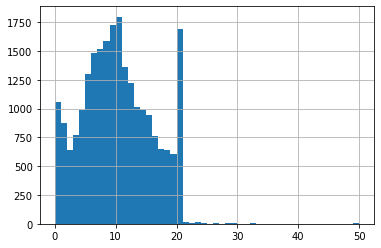

In [29]:
data.total_images.hist(bins=50)

Распределение почти нормальное, но виден пик у значения 20 и выброс в виде 50 картинок. По идее этот столбец вообще можно дропнуть, так как в исследованиях он не используется, соответственно его можно и нетрогать

- last_price

<AxesSubplot:>

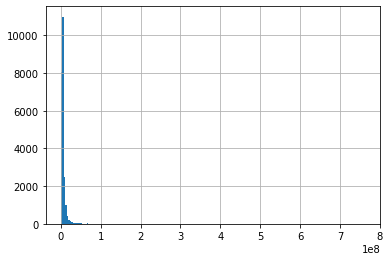

In [30]:
data.last_price.hist(bins=200)

Единственное, что напрягает, значения расположенные от 100 миллионов рублей.

<AxesSubplot:>

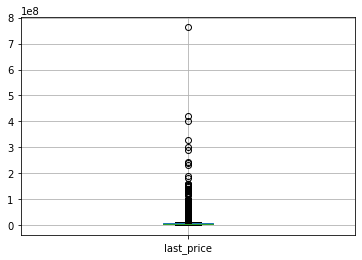

In [31]:
data.boxplot(column='last_price')

In [32]:
data[data['last_price'] == data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
12971,19,763000000,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,14.5,2,санкт-петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,"(79.6, 900.0]"


Скорее всего такие дорогие квартиры находились в центре питера. Либо же ошибка в нуле еще могла быть

In [33]:
data[data['last_price'] >= 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
793,20,135000000,310.0,2018-05-22,4,3.30,5.0,250.00,2,False,False,False,50.00,0,санкт-петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,"(79.6, 900.0]"
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.00,3,False,False,False,63.00,2,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,"(79.6, 900.0]"
1188,20,118000000,290.6,2018-06-01,6,3.82,6.0,188.70,3,False,False,False,22.00,1,санкт-петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0,"(79.6, 900.0]"
1300,14,120000000,280.0,2018-07-12,5,4.70,4.0,162.00,3,False,False,False,30.00,0,санкт-петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0,"(79.6, 900.0]"
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,False,False,40.00,0,санкт-петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,"(79.6, 900.0]"
1928,11,125000000,224.5,2017-01-24,4,2.65,4.0,163.50,3,False,False,False,30.00,1,санкт-петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0,"(79.6, 900.0]"
2243,9,130278280,304.0,2015-07-24,5,3.11,9.0,58.00,7,False,False,False,14.50,0,санкт-петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0,"(79.6, 900.0]"
2536,16,159984000,242.4,2015-08-27,4,3.85,9.0,131.00,7,False,False,False,20.00,0,санкт-петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0,"(79.6, 900.0]"
3117,19,140000000,631.0,2019-03-30,7,2.65,5.0,58.00,5,False,False,False,60.00,0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,"(79.6, 900.0]"
4996,20,124000000,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0,санкт-петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,"(79.6, 900.0]"


Возьмем данные до 100 миллионов рублей, остальные выбросим

In [34]:
good_data = data.query('last_price < 100000000')

- total_area

<AxesSubplot:>

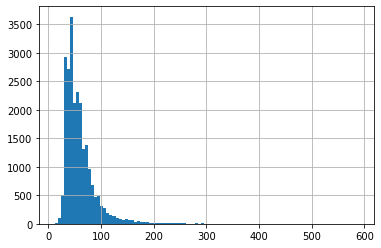

In [35]:
good_data.total_area.hist(bins=100)

In [36]:
good_data[good_data['total_area'] >= 250]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
155,8,96000000,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,False,False,14.5,1,санкт-петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,"(79.6, 900.0]"
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,False,False,21.1,0,санкт-петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,"(79.6, 900.0]"
581,20,65000000,365.0,2019-03-18,7,2.90,7.0,58.0,7,False,False,False,14.5,0,санкт-петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,"(79.6, 900.0]"
660,3,49950000,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,санкт-петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,"(79.6, 900.0]"
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,"(79.6, 900.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22345,8,53250000,290.0,2017-09-25,6,2.90,7.0,180.0,6,False,False,False,18.0,1,санкт-петербург,25512.0,6079.0,3.0,427.0,0.0,NaN,134.0,"(79.6, 900.0]"
22494,7,91075000,491.0,2017-05-27,5,4.20,9.0,274.0,9,False,False,False,45.0,0,санкт-петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0,"(79.6, 900.0]"
22835,20,29000000,275.0,2018-07-27,5,2.65,17.0,180.0,17,False,False,False,17.0,0,санкт-петербург,37593.0,13114.0,1.0,570.0,3.0,502.0,91.0,"(79.6, 900.0]"
23005,20,30750000,297.5,2018-09-09,6,3.14,4.0,181.8,2,False,False,False,21.9,0,санкт-петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0,"(79.6, 900.0]"


Присутсвуют аномальные значения. Возьмем значения до 250

In [37]:
good_data = good_data.query('total_area < 250')

- rooms

In [38]:
good_data.rooms.value_counts()

1     8046
2     7939
3     5802
4     1163
5      291
0      196
6       82
7       37
8        7
9        2
11       2
10       1
14       1
Name: rooms, dtype: int64

<AxesSubplot:>

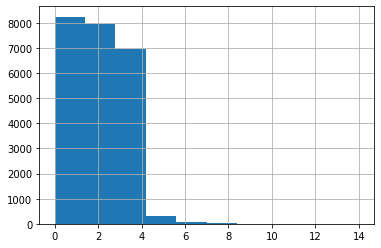

In [39]:
good_data.rooms.hist(bins=10)

Возьмем значения до 7. Дальше уже выбросы.

In [40]:
good_data = good_data.query('rooms <= 7')

- ceiling_height

То, что выше, 20 метров скорее всего опечатка. Поделим то, что выше или равно 20 м, на 10.

In [41]:
good_data.loc[good_data['ceiling_height'] >= 20, 'ceiling_height'] = good_data.loc[good_data['ceiling_height'] >= 20, 'ceiling_height'] / 10

<AxesSubplot:>

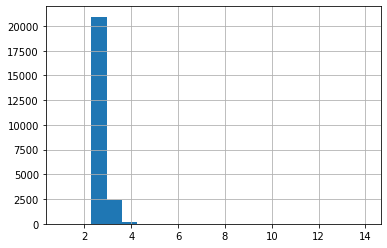

In [42]:
good_data['ceiling_height'].hist(bins=20)

In [43]:
good_data[(good_data['ceiling_height'] < 2) | (good_data['ceiling_height'] > 5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
3474,3,1400000,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,False,False,7.30,0,нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,"(11.999, 36.0]"
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,False,False,5.20,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,"(36.0, 43.6]"
5863,20,5650000,45.0,2018-08-15,1,8.30,16.0,19.3,14,False,False,False,8.30,1,санкт-петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,"(43.6, 52.0]"
7578,17,38000000,143.0,2017-11-02,3,5.50,5.0,83.0,5,False,False,False,29.00,1,санкт-петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,"(79.6, 900.0]"
12628,14,3900000,50.0,2018-03-29,1,5.30,5.0,28.3,5,False,False,False,7.50,0,санкт-петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,"(43.6, 52.0]"
15061,19,5600000,56.4,2018-05-11,2,14.00,14.0,32.4,5,False,False,False,9.10,2,санкт-петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,"(52.0, 62.0]"
15743,14,5600000,67.0,2016-11-11,3,8.00,16.0,41.0,1,False,False,False,8.00,0,санкт-петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0,"(62.0, 79.6]"
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,False,False,8.34,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,"(36.0, 43.6]"
17442,0,5350000,54.0,2015-06-16,2,8.00,5.0,29.0,2,False,False,False,8.50,1,красное,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0,"(52.0, 62.0]"
21227,0,8200000,71.0,2017-07-21,0,5.80,5.0,68.0,5,False,True,False,10.10,0,санкт-петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,"(62.0, 79.6]"


Возьмем данные, которые не меньше 2 и не больше 5. Потеряем лишь 14 записей

In [44]:
good_data = good_data.query('2 <= ceiling_height <= 5')

- floors_total

<AxesSubplot:>

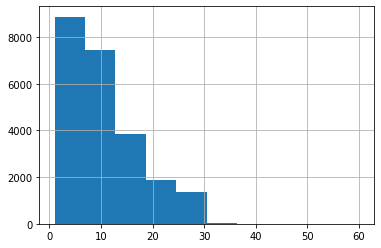

In [45]:
good_data.floors_total.hist()

In [46]:
good_data[good_data['floors_total'] > 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
397,15,5990000,54.0,2018-03-22,2,2.65,36.0,21.4,28,False,False,False,18.7,1,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,"(52.0, 62.0]"
871,14,7777777,75.0,2017-11-16,2,2.65,35.0,40.5,23,False,False,False,11.7,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,"(62.0, 79.6]"
1060,10,5200000,50.0,2015-11-06,2,2.65,35.0,39.0,15,False,False,False,20.5,2,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,"(43.6, 52.0]"
1697,11,3550000,28.0,2018-02-08,1,2.65,34.0,18.0,23,False,False,False,7.2,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,"(11.999, 36.0]"
1917,13,10150000,74.0,2017-11-17,2,2.80,35.0,34.4,30,False,False,False,13.0,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,"(62.0, 79.6]"
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,"(43.6, 52.0]"
2966,9,4300000,37.0,2017-08-08,1,2.65,35.0,14.0,15,False,False,False,10.4,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,"(36.0, 43.6]"
4855,12,5500000,50.0,2017-06-22,1,2.80,35.0,22.0,4,False,False,False,13.0,0,санкт-петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,"(43.6, 52.0]"
5749,20,3590000,25.0,2017-08-30,0,2.80,35.0,17.0,26,False,False,True,7.2,2,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0,"(11.999, 36.0]"
5807,17,8150000,80.0,2019-01-09,2,2.70,36.0,41.0,13,False,False,False,12.0,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,"(79.6, 900.0]"


Возьмем значения до 30 включая, потеряем 31 записей.

In [47]:
good_data = good_data.query('floors_total <= 30')

- living_area

<AxesSubplot:>

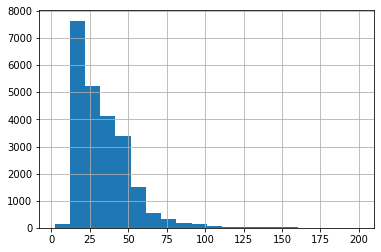

In [48]:
good_data.living_area.hist(bins=20)

In [49]:
good_data[good_data['living_area'] > 120]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
417,5,14200000,178.0,2017-10-26,5,3.30,4.0,126.6,2,False,False,False,19.4,0,санкт-петербург,24287.0,2835.0,0.0,NaN,3.0,257.0,104.0,"(79.6, 900.0]"
509,5,90000000,225.0,2016-06-26,6,2.65,4.0,134.0,2,False,False,False,19.5,2,санкт-петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0,"(79.6, 900.0]"
521,20,25717300,230.1,2015-01-21,3,2.65,3.0,130.0,1,False,False,False,26.1,1,пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0,"(79.6, 900.0]"
670,5,13700000,178.0,2017-08-08,4,2.77,16.0,125.0,4,False,False,False,16.0,1,александровская,13012.0,27584.0,0.0,NaN,1.0,914.0,112.0,"(79.6, 900.0]"
681,20,24900000,249.0,2015-08-13,7,2.65,5.0,180.0,4,False,False,False,14.5,1,санкт-петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0,"(79.6, 900.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22907,9,65000000,228.0,2016-06-02,4,2.65,5.0,200.0,2,False,False,False,14.5,0,санкт-петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN,"(79.6, 900.0]"
22965,19,35000000,236.0,2019-03-26,6,4.00,5.0,164.3,2,False,False,False,16.4,1,санкт-петербург,31670.0,8748.0,1.0,243.0,1.0,827.0,18.0,"(79.6, 900.0]"
23091,20,33000000,186.0,2017-10-11,3,3.00,5.0,130.0,3,False,False,False,16.0,1,санкт-петербург,24785.0,3359.0,0.0,NaN,0.0,NaN,138.0,"(79.6, 900.0]"
23400,17,30000000,213.0,2017-09-28,7,3.40,5.0,151.4,5,False,False,False,30.8,0,санкт-петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,"(79.6, 900.0]"


Возьмем значения до 120 включая, 112 записей потеряем

In [50]:
good_data = good_data.query('living_area <= 120')

- floor

Думаю, его можно не трогать

<AxesSubplot:>

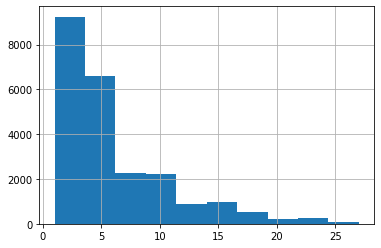

In [51]:
good_data.floor.hist()

- kitchen_area

<AxesSubplot:>

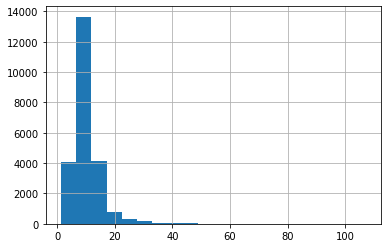

In [52]:
good_data.kitchen_area.hist(bins=20)

In [53]:
good_data[good_data['kitchen_area'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(79.6, 900.0]"
51,7,45000000,161.0,2017-10-17,3,3.20,8.0,38.0,4,False,False,False,50.0,0,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,"(79.6, 900.0]"
263,12,39900000,140.6,2016-11-19,2,3.50,8.0,39.8,7,False,False,False,49.2,4,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN,"(79.6, 900.0]"
492,18,95000000,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,False,False,77.0,0,санкт-петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0,"(79.6, 900.0]"
511,7,5950000,69.0,2017-12-21,1,2.65,16.0,13.0,12,False,False,False,50.0,1,мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0,"(62.0, 79.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21276,0,17122148,178.3,2017-02-10,1,2.65,3.0,58.0,1,False,False,False,41.6,1,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,"(79.6, 900.0]"
21331,15,16000000,93.4,2019-03-26,3,2.80,17.0,24.3,6,False,False,False,49.4,0,санкт-петербург,30954.0,8248.0,0.0,NaN,2.0,495.0,NaN,"(79.6, 900.0]"
21699,20,29000000,193.0,2017-07-10,3,3.35,6.0,111.0,3,False,False,False,42.0,0,санкт-петербург,24564.0,4782.0,1.0,674.0,0.0,NaN,224.0,"(79.6, 900.0]"
22980,19,24500000,155.4,2017-10-10,3,3.00,4.0,72.0,2,False,False,False,65.0,0,санкт-петербург,43758.0,15461.0,1.0,756.0,2.0,278.0,325.0,"(79.6, 900.0]"


Отсеим то, что больше 40

In [54]:
good_data = good_data.query('kitchen_area <= 40')

- balcony

<AxesSubplot:>

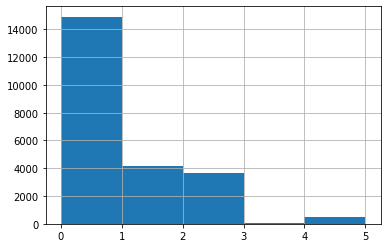

In [55]:
good_data.balcony.hist(bins=5)

<AxesSubplot:>

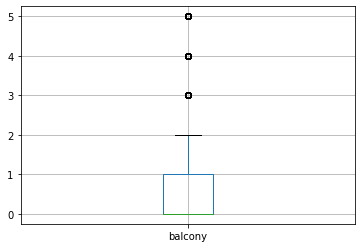

In [56]:
good_data.boxplot(column='balcony')

In [57]:
good_data[good_data['balcony'] > 4]['balcony'].count()

298

Думаю 5 балконов это нормально)

- airports_nearest

<AxesSubplot:>

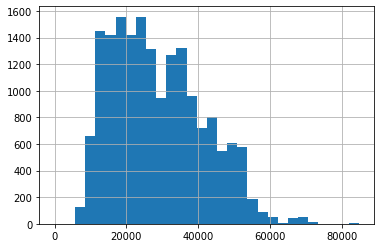

In [58]:
good_data.airports_nearest.hist(bins=30)

In [59]:
good_data[good_data['airports_nearest'] > 70000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
302,6,3500000,31.0,2016-04-05,1,2.55,5.0,17.5,1,False,False,False,5.4,0,зеленогорск,72005.0,53104.0,3.0,92.0,1.0,571.0,168.0,"(11.999, 36.0]"
376,18,8400000,84.0,2018-06-26,2,2.75,3.0,41.0,1,False,False,False,13.0,0,зеленогорск,73827.0,54926.0,0.0,NaN,0.0,NaN,201.0,"(79.6, 900.0]"
577,7,4000000,59.0,2017-07-23,3,2.50,5.0,37.0,1,False,False,False,7.0,0,молодежное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN,"(52.0, 62.0]"
939,17,3015000,31.2,2019-04-16,1,2.50,3.0,17.5,1,False,False,False,5.8,0,зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,NaN,"(11.999, 36.0]"
2036,19,6100000,50.0,2018-03-24,2,2.60,5.0,29.0,5,False,False,False,9.0,1,зеленогорск,71618.0,52717.0,3.0,37.0,1.0,926.0,72.0,"(43.6, 52.0]"
2974,13,3200000,46.3,2018-03-31,2,2.50,3.0,29.2,2,False,False,False,7.0,1,зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0,"(43.6, 52.0]"
3477,4,6400000,67.2,2016-10-10,3,2.65,6.0,43.0,1,False,False,False,12.0,0,зеленогорск,71597.0,52696.0,3.0,112.0,1.0,408.0,316.0,"(62.0, 79.6]"
3936,10,4250000,38.0,2017-11-30,1,2.70,3.0,20.0,3,False,False,False,8.0,0,зеленогорск,72078.0,53177.0,3.0,533.0,2.0,123.0,179.0,"(36.0, 43.6]"
4441,6,2300000,31.0,2016-05-26,1,2.65,3.0,12.0,1,False,False,False,9.0,0,зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0,"(11.999, 36.0]"
4906,11,5500000,49.0,2017-10-24,2,2.50,5.0,29.0,3,False,False,False,8.5,1,зеленогорск,71529.0,52628.0,3.0,296.0,2.0,521.0,25.0,"(43.6, 52.0]"


Отсеим то, что больше 70000

In [60]:
# использовал тильду, потому что при знаке <= почему то срезу 20 процентов данных ((
good_data = good_data.query('~(airports_nearest > 70000)')

- cityCenters_nearest

<AxesSubplot:>

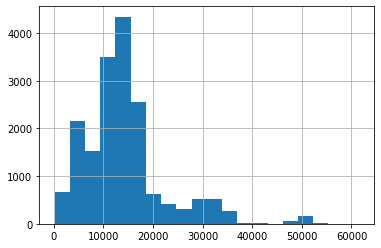

In [61]:
good_data.cityCenters_nearest.hist(bins=20)

In [62]:
good_data[good_data['cityCenters_nearest'] > 53000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
1556,3,4900000,84.0,2017-07-18,3,2.65,3.0,56.0,1,False,False,False,10.0,0,ломоносов,49870.0,53294.0,2.0,241.0,3.0,190.0,623.0,"(79.6, 900.0]"
4893,13,2650000,29.7,2019-04-22,1,2.55,5.0,15.5,4,False,False,False,5.2,0,ломоносов,49653.0,53078.0,0.0,NaN,3.0,343.0,NaN,"(11.999, 36.0]"
9154,5,1850000,29.0,2017-04-20,1,2.65,5.0,18.0,1,False,False,False,7.2,0,ломоносов,49603.0,53028.0,2.0,553.0,3.0,212.0,189.0,"(11.999, 36.0]"
16569,13,3200000,52.8,2017-06-20,2,2.55,5.0,29.9,3,False,False,False,8.3,0,ломоносов,53042.0,61495.0,2.0,223.0,0.0,NaN,240.0,"(52.0, 62.0]"
19729,4,1900000,29.0,2017-09-04,1,2.65,5.0,18.0,1,False,False,False,4.0,0,ломоносов,49663.0,53088.0,2.0,417.0,3.0,329.0,53.0,"(11.999, 36.0]"
20326,0,2900000,44.1,2018-09-24,2,2.55,5.0,30.9,2,False,False,False,6.1,0,ломоносов,49603.0,53028.0,2.0,553.0,3.0,212.0,10.0,"(43.6, 52.0]"
23014,8,2250000,28.3,2017-08-04,1,3.70,3.0,10.9,2,False,False,False,7.3,0,ломоносов,49713.0,53138.0,2.0,170.0,3.0,110.0,424.0,"(11.999, 36.0]"
23123,0,1800000,32.0,2018-07-17,1,2.65,2.0,17.0,1,False,False,False,6.0,0,ломоносов,56896.0,60223.0,1.0,17.0,0.0,NaN,147.0,"(11.999, 36.0]"


Отсеим то, что больше 53000

In [63]:
good_data = good_data.query('~(cityCenters_nearest > 53000)')

- parks_around3000

<AxesSubplot:>

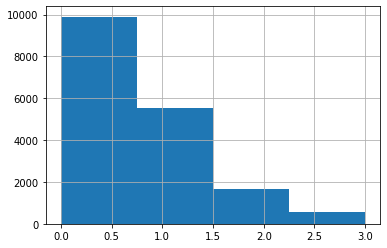

In [64]:
good_data.parks_around3000.hist(bins=4)

Тут вполне всё нормально

- parks_nearest

<AxesSubplot:>

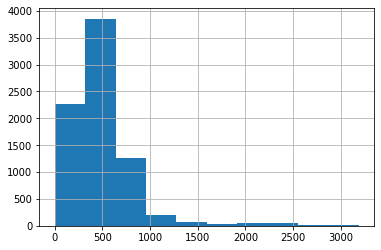

In [65]:
good_data.parks_nearest.hist()

In [66]:
good_data[good_data['parks_nearest'] > 2000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
323,6,9591727,72.00,2017-06-29,2,2.80,10.0,34.00,9,False,False,False,17.00,0,санкт-петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,118.0,"(62.0, 79.6]"
438,6,7410000,70.00,2017-06-29,2,2.65,12.0,42.00,5,False,False,False,10.10,0,санкт-петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,229.0,"(62.0, 79.6]"
512,8,6260000,43.30,2014-12-09,1,2.65,8.0,18.60,5,False,False,False,10.00,0,санкт-петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1155.0,"(36.0, 43.6]"
680,14,7200000,43.00,2017-10-31,1,2.65,8.0,9.00,2,False,False,False,23.00,0,санкт-петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,"(36.0, 43.6]"
684,5,9200000,82.93,2014-12-09,2,2.65,12.0,41.92,6,False,False,False,16.74,2,санкт-петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1141.0,"(79.6, 900.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,15,4650000,44.50,2018-02-20,2,2.65,5.0,25.20,2,False,False,False,5.50,1,санкт-петербург,14965.0,9877.0,1.0,2984.0,1.0,284.0,152.0,"(43.6, 52.0]"
23159,2,7952000,64.00,2018-07-05,2,2.75,10.0,37.00,3,False,False,False,11.00,1,санкт-петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,54.0,"(62.0, 79.6]"
23240,20,21800000,114.00,2019-04-22,3,2.75,15.0,64.40,7,False,False,False,23.30,0,санкт-петербург,37106.0,8256.0,1.0,2009.0,3.0,253.0,NaN,"(79.6, 900.0]"
23404,3,17671500,90.00,2017-02-03,2,2.80,12.0,35.00,9,False,False,False,16.00,1,санкт-петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,277.0,"(79.6, 900.0]"


С учетом того, что у нас отсутствуют 65.9 % процентов данных по parks_nearest, думаю, лучше не трогать. А так, отсеял бы то, что больше 2000

- ponds_around3000

<AxesSubplot:>

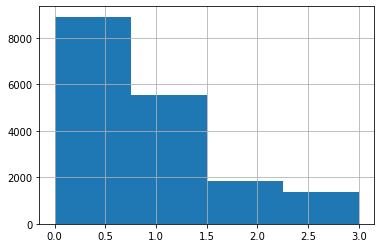

In [67]:
good_data.ponds_around3000.hist(bins=4)

Тут всё в порядке

- ponds_nearest

<AxesSubplot:>

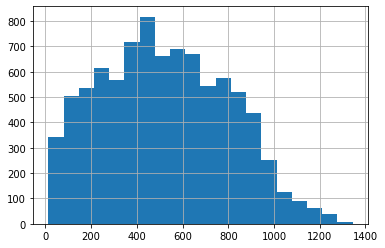

In [68]:
good_data.ponds_nearest.hist(bins=20)

Думаю, можно ничего не трогать

- days_exposition

<AxesSubplot:>

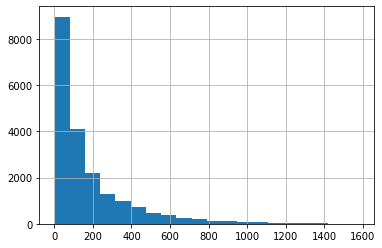

In [69]:
good_data.days_exposition.hist(bins=20)

In [70]:
good_data[good_data['days_exposition'] > 1400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_cat
1109,1,34878556,95.80,2014-12-09,2,2.65,6.0,58.30,5,True,False,False,20.00,1,санкт-петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,"(79.6, 900.0]"
1885,2,13300000,79.60,2014-12-09,2,3.00,8.0,42.70,7,False,False,False,18.00,0,санкт-петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,"(62.0, 79.6]"
2941,3,10090000,71.90,2015-02-02,2,2.65,10.0,34.10,9,False,False,False,16.80,2,санкт-петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1458.0,"(62.0, 79.6]"
4736,11,6650000,68.30,2015-02-19,4,2.63,5.0,45.10,4,False,False,False,9.00,0,санкт-петербург,20182.0,1724.0,3.0,606.0,3.0,453.0,1477.0,"(62.0, 79.6]"
6006,4,4400000,38.63,2015-02-03,1,2.85,25.0,15.00,6,False,False,False,12.30,2,парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,1452.0,"(36.0, 43.6]"
6691,3,4400000,42.98,2014-12-12,1,2.65,5.0,18.72,1,False,False,False,11.31,0,пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,"(36.0, 43.6]"
6726,6,11995000,83.82,2014-11-27,2,2.73,11.0,42.31,1,False,False,False,17.85,0,санкт-петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1406.0,"(79.6, 900.0]"
9553,11,10600000,80.00,2014-12-09,3,2.85,17.0,44.00,9,False,False,False,15.00,0,санкт-петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,"(79.6, 900.0]"
9555,11,9950000,61.20,2015-04-06,2,3.17,7.0,39.70,2,False,False,False,8.00,0,санкт-петербург,9740.0,10123.0,1.0,114.0,0.0,NaN,1434.0,"(52.0, 62.0]"
11955,4,11400000,76.00,2014-12-09,2,2.65,9.0,36.00,3,False,False,False,14.00,0,санкт-петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1484.0,"(62.0, 79.6]"


Отсеим данные, где days_exposition > 1400

In [71]:
good_data = good_data.query('~(days_exposition > 1400)')

In [72]:
1 -good_data.shape[0] / data.shape[0]

0.022616988058567822

##### Вывод:

Естестенно, категорильные данные мы не обрабатываем, только количественные.  
В количественных данных гистограммы в основном распределены так, что пик смещен влево, либо же вообще начинается в начале. Больше похоже на распределение Пуассона.  
**2.3%**  данных потеряли.  
Практически везде присутствовали аномалии, но я не был уверен, что это могла быть ошибка человека(вдруг в площади квартиры добавил один нолик и тд). Поэтому мной было принято решение, просто обрезать аномалии, но обрезать так, чтобы потери были небольшие, в нашем случае это 2.3% 


### Посчитайте и добавьте в таблицу новые столбцы

- цена одного квадратного метра;

In [73]:
good_data['price_meter_square'] = good_data['last_price'] / good_data['total_area']

- день недели публикации объявления;

In [74]:
good_data['day'] = pd.DatetimeIndex(good_data['first_day_exposition']).weekday

- месяц публикации объявления;

In [75]:
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month

- год публикации объявления;

In [76]:
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year

- тип этажа квартиры

In [77]:
def get_type_floor(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [78]:
good_data['floor_type'] = good_data.apply(get_type_floor, axis=1)

- расстояние до центра города в километрах;

In [79]:
good_data['cityCenters_nearest_km'] = good_data[~good_data['cityCenters_nearest'].isna()]['cityCenters_nearest'].apply(lambda x: round(x / 1000))

### Проведите исследовательский анализ данных

#### 1. Изучите следующие параметры объектов:

- общая площадь;

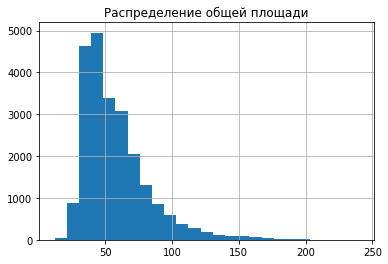

In [80]:
good_data.total_area.hist(bins=25)
plt.title('Распределение общей площади');

В датасете большинство данных имеют площадь от 40 до 50 метров квадратных, скорее всего двушки. Затем на втором месте от 25 до 40, скорее всего однушки. Присутсвтуют редкие значения, примерно от 125 метров квадратных

- жилая площадь;

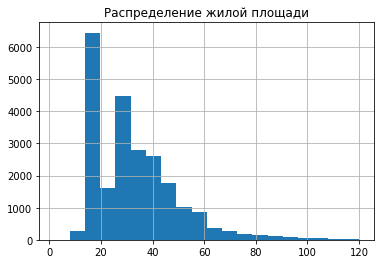

In [81]:
good_data.living_area.hist(bins=20)
plt.title('Распределение жилой площади');

Скорее всего, из-за того, как я заполнил пустые значения на этапе преобработки, образовался пик между значениями 13 и 20.  
Второй пик занимет место между 26 и 32. Также есть редкие значения до 13 и от 60 метров квадратных.

- площадь кухни;

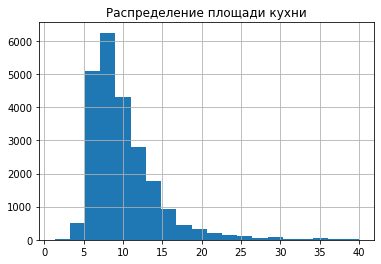

In [82]:
good_data.kitchen_area.hist(bins=20)
plt.title('Распределение площади кухни');

Плоащь кухни в основном имеет значения от 7-9. Далее идет 5 до 7. До 3 и от 25 уже редкие значения.

- цена объекта;

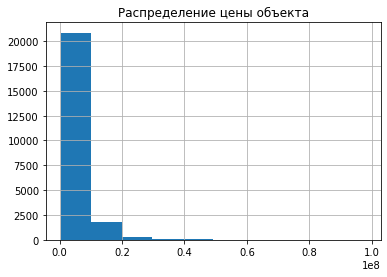

In [83]:
good_data.last_price.hist()
plt.title('Распределение цены объекта');

Рассмотрим данные в диапозоне от 0 до 40 млн, так от 40 млн столбцы практически совпадают с нулем.

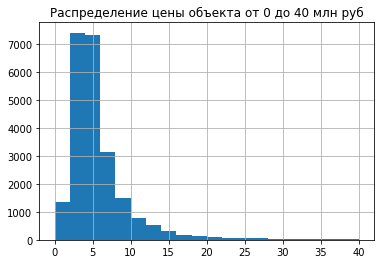

In [84]:
good_data.last_price.apply(lambda x: x / 1000000).hist(range=(0, 40), bins= 20)
plt.title('Распределение цены объекта от 0 до 40 млн руб');

Цены в основном имели значения от 2 млн до 6 млн руб. От 20 млн руб можно считать за редкие значения

- количество комнат;

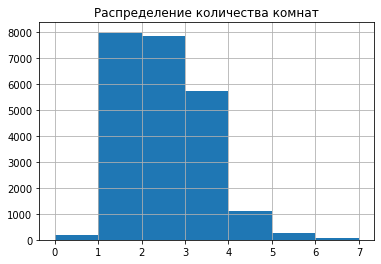

In [85]:
good_data.rooms.hist(bins=7)
plt.title('Распределение количества комнат');

Большинство данных имеют кол-во комнат от 2 включая до 4 включая. Остальные случаи редкие.

- высота потолков;

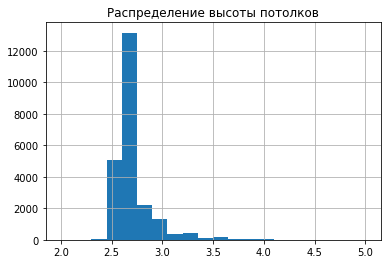

In [86]:
good_data.ceiling_height.hist(bins=20)
plt.title('Распределение высоты потолков');

Высота потолков в основном 2.7 метров. До 2.4 и от 3.6 м потолки практически остутсвуют, можно сказать что выбросы.

- этаж квартиры;

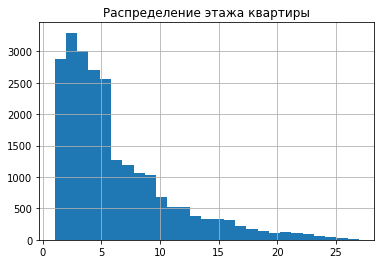

In [87]:
good_data.floor.hist(bins=27)
plt.title('Распределение этажа квартиры');

Недвижимость в основном расположена на нижних этажах. Крайне редко она распалагась на этажах 15+. Скорее всего недвижимость в основном продавалась в 5-ти или 9-ти этажках.

- тип этажа квартиры;

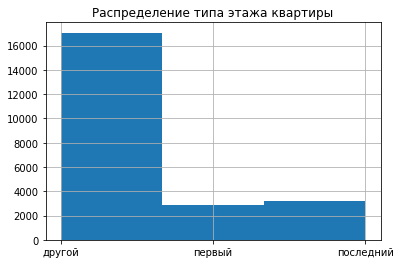

In [88]:
good_data.floor_type.hist(bins=3)
plt.title('Распределение типа этажа квартиры');

Недвижиость в основном продавали на этажах, между первым и последним.

- общее количество этажей в доме;

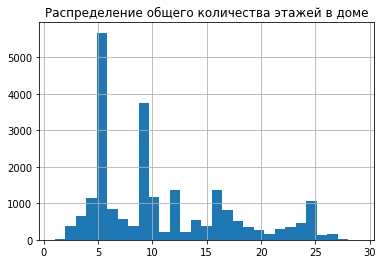

In [89]:
good_data.floors_total.hist(bins=29)
plt.title('Распределение общего количества этажей в доме');

Видно, что недвижимость в основном продавалась в 5-ти и 9-ти этажках. На нормальное распределение вообще не похоже. На графике видны 5 пиков.

- расстояние до центра города в метрах;

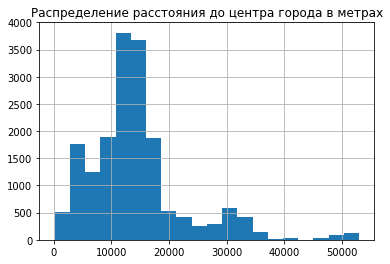

In [90]:
good_data.cityCenters_nearest.hist(bins=20)
plt.title('Распределение расстояния до центра города в метрах');

Данные в основном имеют от 12 до 16 км до центра города. Без редких значений тоже не обошлось, они идут от 35 км.

- расстояние до ближайшего аэропорта;

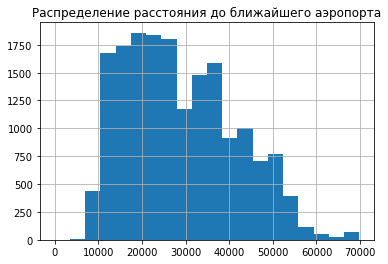

In [91]:
good_data.airports_nearest.hist(bins=20)
plt.title('Распределение расстояния до ближайшего аэропорта');

Большинство данных имеют расстояние до ближ. аэропорта от 11 до 27 км. Редкие значения от 56 км.

- расстояние до ближайшего парка;

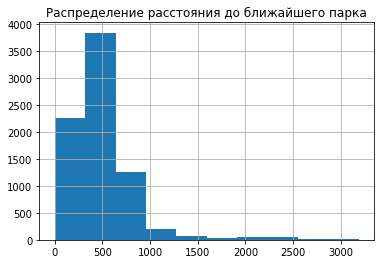

In [92]:
good_data.parks_nearest.hist()
plt.title('Распределение расстояния до ближайшего парка');

Данные в основном имеют расстояние до ближ. парка до 1 км, дальше 1 км значения уже редки.

- день и месяц публикации объявления.

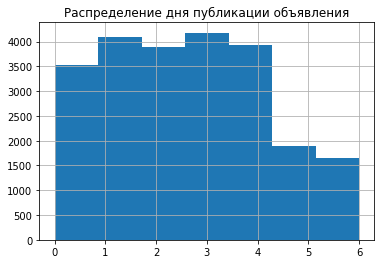

In [93]:
good_data.day.hist(bins=7)
plt.title('Распределение дня публикации объявления');

Видно, что в выходные объявления меньше публиковались. Больше всего объявлений публиковалось в четверг. Но в целом, в будние дни кол-во данных не сильно отличаются друг от друга.

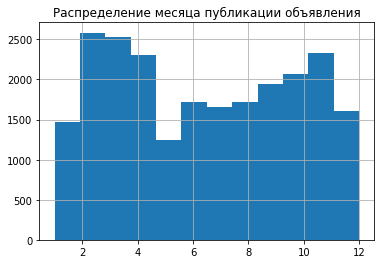

In [94]:
good_data.month.hist(bins=12)
plt.title('Распределение месяца публикации объявления');

Обяъвления в основном публиковались в феврале. Меньше всего в мае.

#### 2. Изучите, как быстро продавались квартиры (столбец days_exposition)

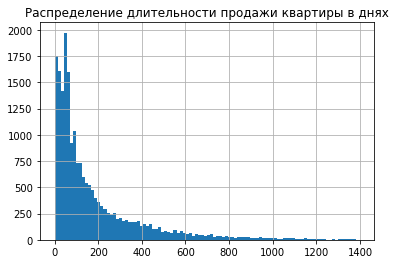

In [95]:
good_data.days_exposition.hist(bins=100)
plt.title('Распределение длительности продажи квартиры в днях');

In [96]:
good_data.days_exposition.median()

94.0

In [97]:
good_data.days_exposition.mean()

178.0158738057325

In [98]:
good_data.days_exposition.describe()

count    20096.000000
mean       178.015874
std        214.369658
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1396.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

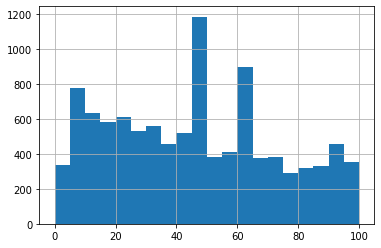

In [99]:
good_data.days_exposition.hist(range=(0, 100), bins=20)

Исходя из медианы, продажа обычно занимает 94 дней. Столбцы сливаются практически с нулем на значении 800, поэтому от 800 дней можно считать необычно долгими. Быстрыми можно считать продажи, которые длились до 45 дней

#### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

- общая площадь

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

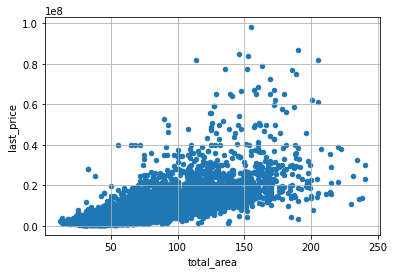

In [100]:
good_data.plot(x='total_area', y='last_price', grid=True, kind='scatter')

In [101]:
good_data.total_area.corr(good_data.last_price)

0.7304831705036654

По графику видно и корреляция показывает, что в среднем при увеличении площади увеличивается цена квартиры. Также можно увидеть уникальные случаи.

- жилая площадь

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

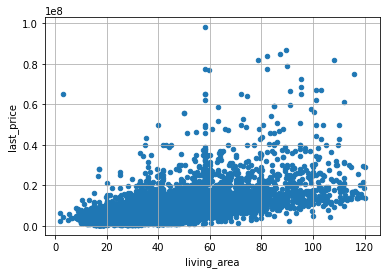

In [102]:
good_data.plot(x='living_area', y='last_price', grid=True, kind='scatter')

In [103]:
good_data.living_area.corr(good_data.last_price)

0.6178664758419601

Тоже видно, но уже слабо, что при увеличении жилой площади растет и цена. Корреляция меньше, чем при общей площади.

- площадь кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

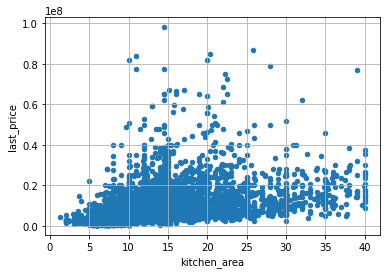

In [104]:
good_data.plot(x='kitchen_area', y='last_price', grid=True, kind='scatter')

In [105]:
good_data.kitchen_area.corr(good_data.last_price)

0.526558382388228

Корреляция еще меньше, чем при жилой площади. Но также можно увидеть, что при увеличении площади кухни растет и цена. 

- кол-во комнат

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

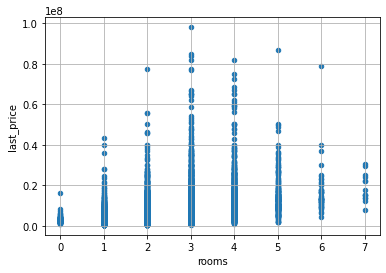

In [106]:
good_data.plot(x='rooms', y='last_price', grid=True, kind='scatter')

In [107]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc=['median','mean'])

,median,mean
,last_price,last_price
rooms,,
0,2700000,2.961009e+06
1,3600000,3.820737e+06
2,4750000,5.488315e+06
3,6150000,7.801905e+06
4,8822500,1.162457e+07
5,12000000,1.422302e+07
6,13325500,1.669091e+07
7,16425000,1.880214e+07


In [108]:
good_data.rooms.corr(good_data.last_price)

0.4348863472076049

Видно, что цена растет при увеличении кол-ва комнат, но корреляция слабая.

- тип этажа

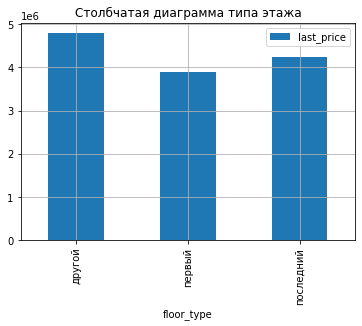

In [109]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='median') \
.plot.bar(grid=True, title='Столбчатая диаграмма типа этажа');

Думают тут можно сказать, что цена на недвижимость на первых этажах ниже, чем на остальных. Не думаю, что целесообразно строить корреляцию по параметру, который имеет три значения.

- день даты размещения;

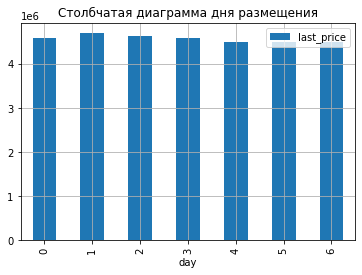

In [110]:
good_data.pivot_table(index='day', values='last_price', aggfunc='median')\
.plot.bar(grid=True, title='Столбчатая диаграмма дня размещения');

День недели никак не влияет на цену недвижимости

- месяц даты размещения;

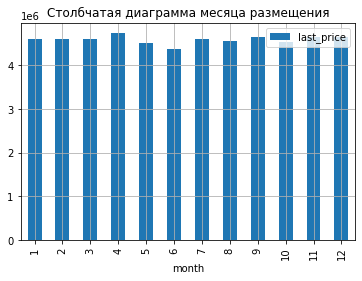

In [111]:
good_data.pivot_table(index='month', values='last_price', aggfunc='median')\
.plot.bar(grid=True, title='Столбчатая диаграмма месяца размещения');

Случай, как и с днем. Особой связи нет

- год даты размещения;

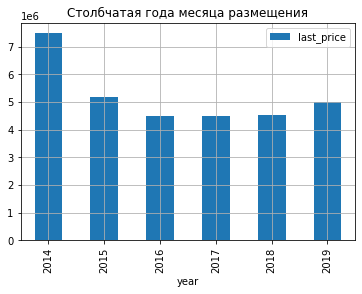

In [112]:
good_data.pivot_table(index='year', values='last_price', aggfunc='median')\
.plot.bar(grid=True, title='Столбчатая года месяца размещения');

In [113]:
good_data.year.corr(good_data.last_price)

-0.046250350323762485

Аналогичная ситуация. Особой связи нет

**Вывод**: 
    
Больше всего зависимость цены проявляется в зависимости от общей площади. Также цена хорошо зависит от других площадей. От категориальных типов особой зависимости нет. Только в 2014 году продались квартиры по более высокой цене, но думаю, там было просто мало объявлений.

#### 4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [114]:
locality_data_pivot = good_data.pivot_table(index='locality_name', values='price_meter_square', aggfunc=['median', 'count'])
locality_data_pivot = locality_data_pivot.droplevel(1, axis=1).reset_index()

In [115]:
locality_data_pivot.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

,locality_name,median,count
220,санкт-петербург,104485.996981,15266
199,пушкин,99725.495196,360
105,кудрово,95555.311677,470
167,парголово,91579.708641,326
143,мурино,86268.871316,585
299,шушары,76876.172608,438
89,колпино,74722.222222,337
42,гатчина,67796.610169,307
34,всеволожск,65789.473684,397
35,выборг,58158.319871,237


**Вывод**:

В Санкт-Петербурге самая высокая средняя стоимость квадратного метра.  
В Выборге низкая средняя стоимость квадратного метра.

#### 5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.

In [116]:
spb_data = good_data.query('locality_name == "санкт-петербург"')
spb_data_pivot = spb_data.pivot_table(index='cityCenters_nearest_km', values='price_meter_square', aggfunc='median')
spb_data_pivot

,price_meter_square
cityCenters_nearest_km,
0.0,138536.993745
1.0,125135.746606
2.0,122047.244094
3.0,109878.048780
4.0,117391.304348
5.0,126966.292135
6.0,129520.837461
7.0,125000.000000
8.0,122222.222222


In [117]:
spb_data.cityCenters_nearest_km.corr(spb_data.price_meter_square)

-0.3425639561213575

Судя по таблице, видно, при отдалении от центра города, цена объекта уменьшается. Корреляция со знаком минус тоже об этом говорит.

### Общий вывод

#### Данные

Рекомендации: 
- Следует уменьшить кол-во пропусков в данных, максимальная их доля была **88** процентов.
- Присутствовали выбросы(значения не в пределах нормы) во многих столбцах, надо исправить 
- Артекфакты в столбце высоты потолков, надо исправить. Возможно и в других столбцах есть, мог посчитать их за выбросы

#### Исследования

1. Недвижимость в основном продавалась в течение **94** дней. Были долгие продажи(от 2 лет и более) и короткие тоже(в течение одного 45 дней).


2. Зависимость цен от следующих параметров:
- **общая площадь**;

От данного параметра проявляется наибольшая зависимость цены. Корреляция состовляет **73%**

- **жилая площадь**;

Цена от этого параметра зависит хорошо, но не так сильно, как от общей площади. Корреляция состовляет **62%**

- **площадь кухни**;

Тоже видна хорошая зависимость, но она меньше, чем у зависимости от жилой площади. Корреляция составляет **53%** 
- **количество комнат**;

Присутствует зависимость. Чем больше комнат, тем больше цена. Оно и логично, потому что, с повышением кол-ва комнат обычно повышается площадь квартиры, а значит и цена растет. Корреляция составляет  **43%**
- **этаж, на котором расположена квартира (первый, последний, другой)**;

На первом этаже квартиры продаются по меньшей цене, чем на других. Цены на последних и других этажах не отличаются особо
- **дата размещения (день недели, месяц, год)**.

Здесь зависимости вообще нет. Только в 2014 году продавались квартиры по более высокой цене, дальше с каждым годом цена не разброс цен не отличается. 

3. Среди 10-ти населённых пунктах с наибольшим числом объявлений  
В Санкт-Петербурге **самая высокая** средняя стоимость квадратного метра.  
В Выборге, наоборот, **низкая** средняя стоимость квадратного метра.  


4. В Санкт-Петербурге наблюдается зависимость цены от расстояния до центра города:  
Чем **ближе** к центру, тем **выше** цена.